# Install Dependencies and Fetch Dataset

In [1]:
random_state = 1
from pprint import pprint

In [2]:
from ucimlrepo import fetch_ucirepo
from pprint import pprint

# fetch dataset
superconductivity_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivity_data.data.features
y = superconductivity_data.data.targets

# metadata
pprint(superconductivity_data.metadata)

# variable information
pprint(superconductivity_data.variables)

{'abstract': 'Two file s contain data on 21263 superconductors and their '
             'relevant features.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'There are two files: (1) train.csv contains '
                                '81 features extracted from 21263 '
                                'superconductors along with the critical '
                                'temperature in the 82nd column, (2) '
                                'unique_m.csv contains the chemical formula '
                                'broken up for all the 21263 superconductors '
                                'from the train.csv file.  The last two '
                                'columns hav

## Data Preparation

We memoize the train/test split with `joblib.Memory` so repeated runs reuse cached data instead of recomputing the split and serialization from the raw UCI dataset.

In [3]:
# test and train split
from sklearn.model_selection import train_test_split
from pathlib import Path
from joblib import Memory

cache_dir = Path("artifacts/cache")
cache_dir.mkdir(parents=True, exist_ok=True)
memory = Memory(cache_dir, verbose=0)


@memory.cache
def prepare_train_test_split(features, targets, test_size, random_state):
    return train_test_split(
        features, targets, test_size=test_size, random_state=random_state
    )


X_train, X_test, y_train, y_test = prepare_train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# Exploratory Data Analysis (EDA)

## Data Inspection

In [4]:
import pandas as pd

# Display the first few rows of the features and target
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
15120,3,50.184346,54.651808,46.389337,53.635948,1.026419,0.681194,45.648461,37.194317,18.643595,...,4.0,4.712500,3.914868,4.677969,1.077556,0.579894,2,3.637500,0.816497,5.290026e-01
7435,5,72.201783,55.586872,58.408700,35.348366,1.441544,1.123995,122.906070,32.949356,40.543237,...,2.6,2.271429,2.491462,2.228925,1.564957,1.173259,2,1.085714,0.800000,4.757379e-01
17485,5,64.602881,76.131458,45.729932,57.377615,1.308306,1.182159,141.250600,38.505068,51.397922,...,2.8,3.207500,2.459509,2.990659,1.494403,1.368704,4,1.207500,1.326650,1.155181e+00
17662,2,49.858425,21.967407,31.002599,14.607953,0.343193,0.680877,78.094850,3.434264,39.047425,...,3.0,3.000000,3.000000,3.000000,0.693147,0.410116,0,2.142857,0.000000,4.440892e-16
7829,5,79.171174,52.702468,59.994943,35.021463,1.389953,1.427340,122.906070,14.851998,50.424957,...,2.2,2.091884,2.168944,2.075917,1.594167,1.267529,1,1.035222,0.400000,2.888616e-01


,critical_temp
15120,8.9
7435,37.0
17485,22.0
17662,6.0
7829,75.2


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
945,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
12019,2,188.028500,186.185560,187.981843,186.148058,0.692899,0.601317,8.37700,78.544040,4.188500,...,6.00,6.000000,6.000000,6.000000,0.693147,0.592953,0,2.640000,0.000000,0.000000
8952,6,120.375212,115.056672,90.122861,85.832382,1.588258,1.320786,192.98100,60.027553,71.797826,...,3.00,3.025000,2.798166,2.758788,1.721089,1.446314,3,1.366667,1.154701,1.356850
8983,5,55.189761,43.644846,40.300849,32.039806,1.314997,1.412474,121.32760,13.687822,44.475649,...,1.80,1.934783,1.741101,1.911603,1.581094,1.352529,1,0.826087,0.400000,0.246909
9998,5,44.503434,47.319535,37.569915,39.314921,1.458218,1.293220,63.90460,22.008651,24.127667,...,2.40,2.821429,2.091279,2.534989,1.467734,1.261866,4,1.392857,1.356466,1.390107


,critical_temp
945,37.20
12019,4.46
8952,41.00
8983,101.00
9998,18.00


In [5]:
# Display the shape of the features and target
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (17010, 81)
Shape of y_train: (17010, 1)
Shape of X_test: (4253, 81)
Shape of y_test: (4253, 1)


In [6]:
# Display the data types of the features and target
print("Data types of features (X):")
print(X_train.dtypes)
print("\nData types of target (y):")
print(y_train.dtypes)

Data types of features (X):
number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
wtd_entropy_Valence      float64
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
Length: 81, dtype: object

Data types of target (y):
critical_temp    float64
dtype: object


## Check for Missing Values

In [7]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
print("Missing values in features (X):")
print(missing_values_X)
print("\nMissing values in target (y):")
print(missing_values_y)

Missing values in features (X):
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
wtd_entropy_Valence      0
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
Length: 81, dtype: int64

Missing values in target (y):
critical_temp    0
dtype: int64


## Summary Statistics

In [8]:
summary_X_train = X_train.describe()
print("Summary statistics for features (X_train):")
print(summary_X_train)

Summary statistics for features (X_train):
       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        17010.000000      17010.000000          17010.000000   
mean             4.110523         87.724038             73.181670   
std              1.443188         29.909043             33.818417   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.601937             52.131878   
50%              4.000000         85.026733             60.689236   
75%              5.000000        100.561774             86.390031   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       17010.000000           17010.000000         17010.000000   
mean           71.474132              58.766076             1.164241   
std            31.306766              36.977159             0.366625   
min             5.320573               1.960849

In [9]:
summary_y_train = y_train.describe()
print("\nSummary statistics for target (y_train):")
print(summary_y_train)


Summary statistics for target (y_train):
       critical_temp
count   17010.000000
mean       34.377001
std        34.295702
min         0.000400
25%         5.300000
50%        20.000000
75%        63.000000
max       185.000000


### Focus on Most Relevant Features
To keep the visualizations digestible for this high-dimensional dataset, we'll focus on the 12 features most correlated with `critical_temp`. These features will be used for the histograms, box plots, and correlation heatmap.

In [10]:
import numpy as np

# Identify the top features most correlated with the target
target_series = (
    y_train["critical_temp"] if "critical_temp" in y_train else y_train.iloc[:, 0]
)
feature_correlations = (
    X_train.corrwith(target_series).abs().sort_values(ascending=False)
)
top_feature_count = 12
top_features = feature_correlations.head(top_feature_count).index.tolist()
print("Top correlated features with critical temperature:")
print(top_features)

Top correlated features with critical temperature:
['wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'range_atomic_radius', 'std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'wtd_gmean_Valence', 'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie', 'entropy_Valence', 'wtd_std_atomic_radius']


## Visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

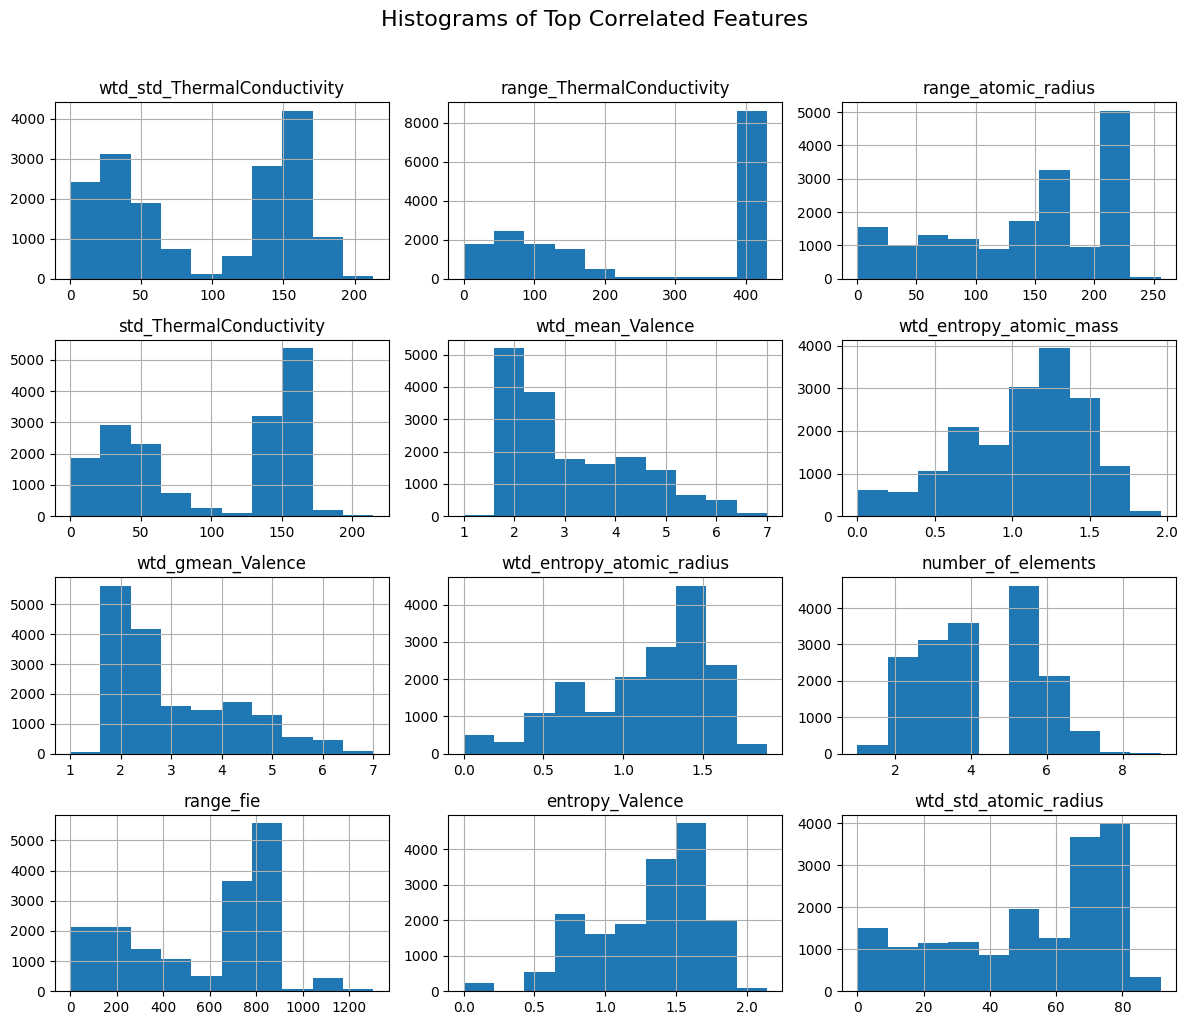

In [12]:
# Histograms for selected features
X_train[top_features].hist(figsize=(12, 10))
plt.suptitle("Histograms of Top Correlated Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

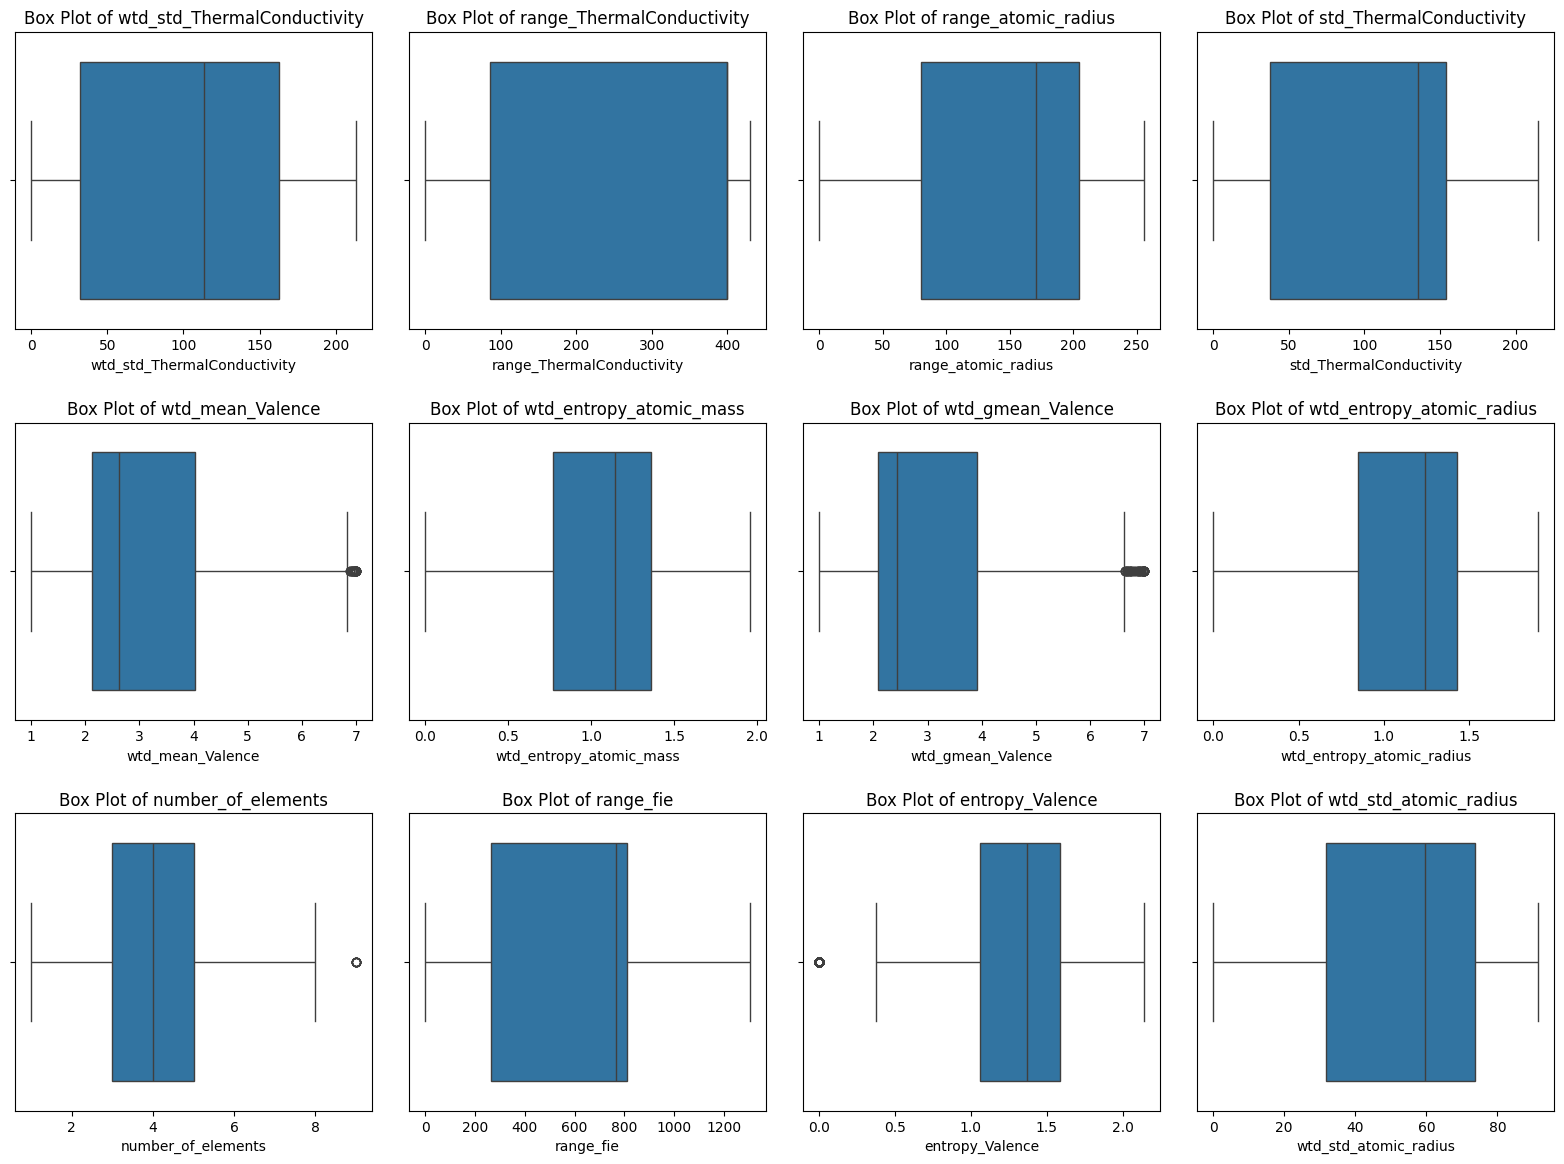

In [13]:
# Box plots for selected features
plot_cols = 4
plot_rows = (len(top_features) + plot_cols - 1) // plot_cols

plt.figure(figsize=(16, plot_rows * 4))
for i, column in enumerate(top_features, 1):
    plt.subplot(plot_rows, plot_cols, i)
    sns.boxplot(x=X_train[column])
    plt.title(f"Box Plot of {column}")

plt.tight_layout(pad=2.0)
plt.show()

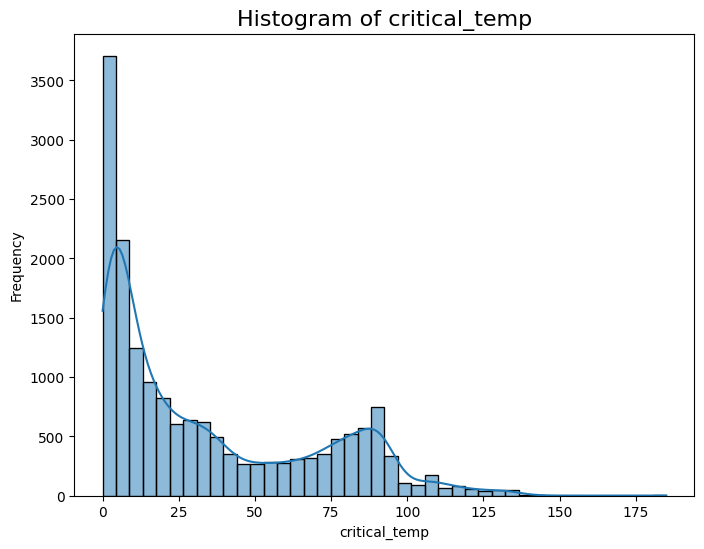

In [14]:
# Histogram of critical_temp
plt.figure(figsize=(8, 6))
sns.histplot(y_train["critical_temp"], kde=True)
plt.title("Histogram of critical_temp", fontsize=16)
plt.xlabel("critical_temp")
plt.ylabel("Frequency")
plt.show()

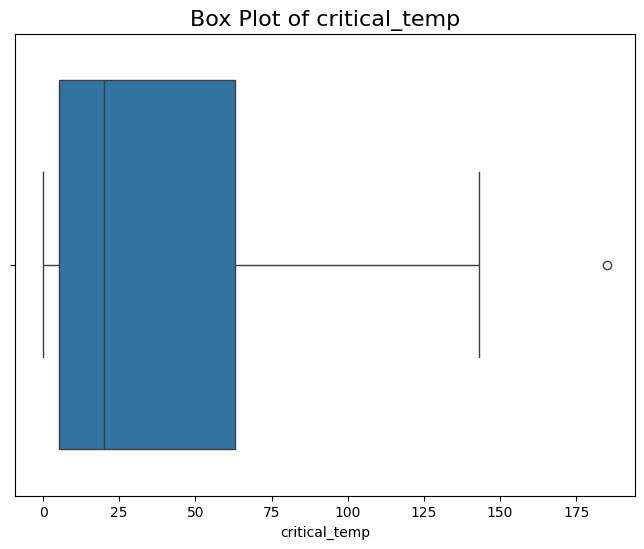

In [15]:
# Box Plot of critical_temp
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train["critical_temp"])
plt.title("Box Plot of critical_temp", fontsize=16)
plt.xlabel("critical_temp")
plt.show()

## Correlation Analysis

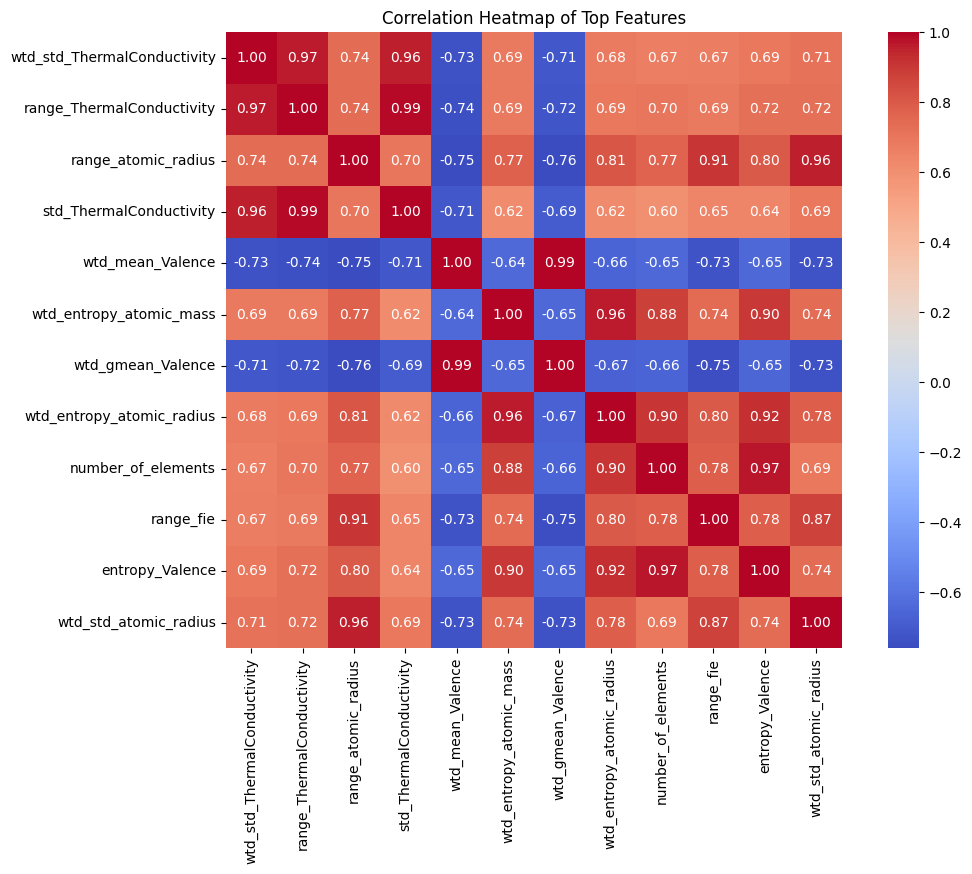

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Top Features")
plt.show()

# Bayesian Optimization

## Objective Function

The goal is to optimize the superconductors' `critical_temp` using Bayesian optimization with an XGBoost surrogate. We'll minimize the negative predicted temperature so that the optimizer effectively maximizes performance.

In [17]:
# First check the actual column names in the DataFrame
print("Actual column names in X_train:")
print(X_train.columns.tolist())

Actual column names in X_train:
['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffini

## XGBoost Model and Bayesian Optimization
We run a lightweight Bayesian search (fewer iterations, 3-fold CV) to map a promising region, then a refined search with tighter bounds and 5-fold validation. Histogram-based trees keep training fast. A small helper inspects the installed `xgboost` version:
- If `fit` accepts `early_stopping_rounds`, it is passed directly.
- Else if `fit` supports `callbacks`, an `EarlyStopping` callback is used.
- Otherwise the search proceeds without early stopping (a warning is emitted).

In [18]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
xgb_model = XGBRegressor(
    random_state=random_state,
    n_jobs=-1,
    tree_method="hist",
    verbosity=0,
    objective="reg:squarederror",
    eval_metric="rmse",
)

In [19]:
# Diagnostics: show xgboost version and fit() signature to understand early stopping support
import xgboost, inspect as _inspect

print("xgboost version:", xgboost.__version__)
print("XGBRegressor.fit signature:")
print(_inspect.signature(XGBRegressor.fit))

xgboost version: 3.0.5
XGBRegressor.fit signature:
(self, X: Any, y: Any, *, sample_weight: Optional[Any] = None, base_margin: Optional[Any] = None, eval_set: Optional[Sequence[Tuple[Any, Any]]] = None, verbose: Union[bool, int, NoneType] = True, xgb_model: Union[xgboost.core.Booster, ForwardRef('XGBModel'), str, NoneType] = None, sample_weight_eval_set: Optional[Sequence[Any]] = None, base_margin_eval_set: Optional[Sequence[Any]] = None, feature_weights: Optional[Any] = None) -> 'XGBModel'


In [20]:
# Define the Bayesian optimization search for XGBoost hyperparameters
import inspect
from xgboost.callback import EarlyStopping
import warnings

search_space_bounds = {
    "n_estimators": (50, 500),
    "max_depth": (3, 10),
    "learning_rate": (0.01, 0.3),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
    "gamma": (0.0, 5.0),
    "reg_alpha": (0.0, 1.0),
    "reg_lambda": (0.0, 1.0),
}

stage_one_search_space = {
    "n_estimators": search_space_bounds["n_estimators"],
    "max_depth": search_space_bounds["max_depth"],
    "learning_rate": (*search_space_bounds["learning_rate"], "uniform"),
    "subsample": (*search_space_bounds["subsample"], "uniform"),
    "colsample_bytree": (*search_space_bounds["colsample_bytree"], "uniform"),
    "gamma": search_space_bounds["gamma"],
    "reg_alpha": search_space_bounds["reg_alpha"],
    "reg_lambda": search_space_bounds["reg_lambda"],
}

initial_iterations = 12
initial_cv_folds = 3
refined_iterations = 25
refined_cv_folds = 5
early_stopping_rounds = 25

y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

fit_signature = inspect.signature(xgb_model.fit)
supports_early_stopping_rounds = "early_stopping_rounds" in fit_signature.parameters
supports_callbacks = "callbacks" in fit_signature.parameters


def make_fit_params():
    params = {
        "eval_set": [(X_test, y_test_array)],
        "verbose": False,
    }
    if supports_early_stopping_rounds:
        params["early_stopping_rounds"] = early_stopping_rounds
    elif supports_callbacks:
        params["callbacks"] = [
            EarlyStopping(
                rounds=early_stopping_rounds,
                save_best=True,
                maximize=False,
            )
        ]
    else:
        warnings.warn(
            "Installed xgboost version does not support early_stopping_rounds or callbacks; proceeding without early stopping.",
            RuntimeWarning,
        )
    return params

In [21]:
# Stage 1: quick search with reduced cross-validation to explore the space fast
xgb_search_stage1 = BayesSearchCV(
    xgb_model,
    stage_one_search_space,
    n_iter=initial_iterations,
    scoring="neg_mean_squared_error",
    cv=initial_cv_folds,
    n_jobs=-1,
    random_state=random_state,
    return_train_score=False,
    refit=True,
    optimizer_kwargs={"base_estimator": "GP"},
)

xgb_search_stage1.fit(X_train, y_train_array, **make_fit_params())

print("Stage 1 — best parameters found:")
pprint(xgb_search_stage1.best_params_)
print(f"Stage 1 — best score (negative MSE): {xgb_search_stage1.best_score_}")
stage_one_best_params = xgb_search_stage1.best_params_

/tmp/ipykernel_1203618/634038124.py:58: RuntimeWarning: Installed xgboost version does not support early_stopping_rounds or callbacks; proceeding without early stopping.
  warnings.warn(


Stage 1 — best parameters found:
OrderedDict([('colsample_bytree', 0.7214906103969682),
             ('gamma', 0.07957505728522808),
             ('learning_rate', 0.17786181375657437),
             ('max_depth', 7),
             ('n_estimators', 84),
             ('reg_alpha', 1.0),
             ('reg_lambda', 0.6100280745058654),
             ('subsample', 0.7932528350755519)])
Stage 1 — best score (negative MSE): -102.81179706588017


In [22]:
# Build a refined search space around the best stage-one parameters
def clip_interval(lower, upper, bounds):
    clipped_lower = max(bounds[0], lower)
    clipped_upper = min(bounds[1], upper)
    if clipped_lower == clipped_upper:
        clipped_lower, clipped_upper = bounds
    return clipped_lower, clipped_upper


refined_search_space = {}
refined_search_space["n_estimators"] = tuple(
    int(val)
    for val in clip_interval(
        stage_one_best_params["n_estimators"] - 100,
        stage_one_best_params["n_estimators"] + 100,
        search_space_bounds["n_estimators"],
    )
)
refined_search_space["max_depth"] = tuple(
    int(val)
    for val in clip_interval(
        stage_one_best_params["max_depth"] - 2,
        stage_one_best_params["max_depth"] + 2,
        search_space_bounds["max_depth"],
    )
)

lr_lower, lr_upper = clip_interval(
    stage_one_best_params["learning_rate"] * 0.5,
    stage_one_best_params["learning_rate"] * 1.5,
    search_space_bounds["learning_rate"],
)
refined_search_space["learning_rate"] = (lr_lower, lr_upper, "uniform")

sub_lower, sub_upper = clip_interval(
    stage_one_best_params["subsample"] - 0.1,
    stage_one_best_params["subsample"] + 0.1,
    search_space_bounds["subsample"],
)
refined_search_space["subsample"] = (sub_lower, sub_upper, "uniform")

col_lower, col_upper = clip_interval(
    stage_one_best_params["colsample_bytree"] - 0.1,
    stage_one_best_params["colsample_bytree"] + 0.1,
    search_space_bounds["colsample_bytree"],
)
refined_search_space["colsample_bytree"] = (col_lower, col_upper, "uniform")

gamma_lower, gamma_upper = clip_interval(
    stage_one_best_params["gamma"] - 1.0,
    stage_one_best_params["gamma"] + 1.0,
    search_space_bounds["gamma"],
)
refined_search_space["gamma"] = (gamma_lower, gamma_upper)

alpha_lower, alpha_upper = clip_interval(
    stage_one_best_params["reg_alpha"] * 0.5,
    stage_one_best_params["reg_alpha"] * 1.5,
    search_space_bounds["reg_alpha"],
)
refined_search_space["reg_alpha"] = (alpha_lower, alpha_upper)

lambda_lower, lambda_upper = clip_interval(
    stage_one_best_params["reg_lambda"] * 0.5,
    stage_one_best_params["reg_lambda"] * 1.5,
    search_space_bounds["reg_lambda"],
)
refined_search_space["reg_lambda"] = (lambda_lower, lambda_upper)

pprint(refined_search_space)

{'colsample_bytree': (0.6214906103969682, 0.8214906103969681, 'uniform'),
 'gamma': (0.0, 1.079575057285228),
 'learning_rate': (0.08893090687828718, 0.26679272063486154, 'uniform'),
 'max_depth': (5, 9),
 'n_estimators': (50, 184),
 'reg_alpha': (0.5, 1.0),
 'reg_lambda': (0.3050140372529327, 0.9150421117587981),
 'subsample': (0.6932528350755519, 0.8932528350755519, 'uniform')}


In [23]:
# Stage 2: extend the search with tighter bounds and higher-fidelity cross-validation
xgb_model_refined = XGBRegressor(
    random_state=random_state,
    n_jobs=-1,
    tree_method="hist",
    verbosity=0,
    objective="reg:squarederror",
    eval_metric="rmse",
)
xgb_model_refined.set_params(**stage_one_best_params)

xgb_opt = BayesSearchCV(
    xgb_model_refined,
    refined_search_space,
    n_iter=refined_iterations,
    scoring="neg_mean_squared_error",
    cv=refined_cv_folds,
    n_jobs=-1,
    random_state=random_state,
    return_train_score=False,
    optimizer_kwargs={"base_estimator": "GP"},
)

xgb_opt.fit(X_train, y_train_array, **make_fit_params())
print("Stage 2 — best parameters found:")
pprint(xgb_opt.best_params_)
print(f"Stage 2 — best score (negative MSE): {xgb_opt.best_score_}")

/tmp/ipykernel_1203618/634038124.py:58: RuntimeWarning: Installed xgboost version does not support early_stopping_rounds or callbacks; proceeding without early stopping.
  warnings.warn(


Stage 2 — best parameters found:
OrderedDict([('colsample_bytree', 0.6214906103969682),
             ('gamma', 1.079575057285228),
             ('learning_rate', 0.08893090687828718),
             ('max_depth', 9),
             ('n_estimators', 147),
             ('reg_alpha', 0.7694093738362677),
             ('reg_lambda', 0.9150421117587981),
             ('subsample', 0.8932528350755519)])
Stage 2 — best score (negative MSE): -91.15363216746505


In [24]:
# Display the best score achieved by XGBoost
print(f"Best score achieved (negative MSE) by XGBoost: {xgb_opt.best_score_}")

Best score achieved (negative MSE) by XGBoost: -91.15363216746505


In [25]:
# Evaluate the optimized XGBoost model on the test set
y_pred_xgb = xgb_opt.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error on test set by XGBoost: {mse_xgb}")

Mean Squared Error on test set by XGBoost: 85.14717102050781


In [26]:
# Use the optimized XGBoost model to predict critical_temp
optimized_critical_temp_xgb = xgb_opt.predict(X_test)
print("Predicted critical_temp using Optimized XGBoost Model:")
print(optimized_critical_temp_xgb)

Predicted critical_temp using Optimized XGBoost Model:
[32.234303   2.8797655 32.623013  ... 33.417908  25.133099   3.1411374]


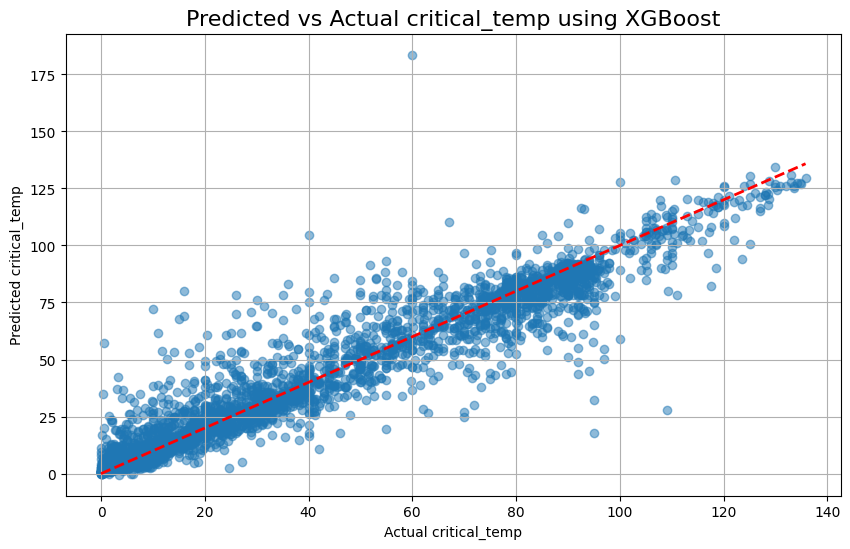

In [27]:
# Visualize the predicted vs actual critical_temp using XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_critical_temp_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Predicted vs Actual critical_temp using XGBoost", fontsize=16)
plt.xlabel("Actual critical_temp")
plt.ylabel("Predicted critical_temp")
plt.grid()
plt.show()

In [28]:
# Objective function for Bayesian optimization with XGBoost
def objective_function_xgb(params):
    """
    Objective function to minimize the negative of the critical_temp using XGBoost.
    This function takes the properties and returns the negative critical_temp.
    """
    # Create a DataFrame with the parameters using X_train.columns
    param_dict = {col: [param] for col, param in zip(X_train.columns, params)}
    elemental_properties = pd.DataFrame(param_dict)
    # Predict the critical_temp using the optimized XGBoost model
    predicted_critical_temp = xgb_opt.predict(elemental_properties)
    # Return the negative critical_temp (as we want to maximize it)
    return -predicted_critical_temp[0]

In [29]:
# Define the search space for the properties based on the min and max values in the training set
search_space_properties_xgb = [
    (X_train[col].min(), X_train[col].max()) for col in X_train.columns
]

In [30]:
from skopt import gp_minimize

# Perform Bayesian optimization to find the optimal properties using XGBoost
result_xgb = gp_minimize(
    objective_function_xgb,
    search_space_properties_xgb,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0198
Function value obtained: -18.2213
Current minimum: -18.2213
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0128
Function value obtained: -15.6358
Current minimum: -18.2213
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0129
Function value obtained: -16.5032
Current minimum: -18.2213
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0129
Function value obtained: -19.2520
Current minimum: -19.2520
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0130
Function value obtained: -15.7652
Current minimum: -19.2520
Iteration No: 6

In [31]:
# Neatly display the best parameters and the best predicted critical_temp along with column names for XGBoost
best_params_xgb = result_xgb.x
best_critical_temp_xgb = (
    -result_xgb.fun
)  # Negate the result to get the actual critical_temp
print("Best parameters found by Bayesian optimization for XGBoost:")
for i, param in enumerate(best_params_xgb):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted critical_temp using XGBoost: {best_critical_temp_xgb}")

Best parameters found by Bayesian optimization for XGBoost:
number_of_elements: 9
mean_atomic_mass: 161.12750624219345
wtd_mean_atomic_mass: 6.4722392522822405
gmean_atomic_mass: 90.3032545489946
wtd_gmean_atomic_mass: 62.71668482236398
entropy_atomic_mass: 0.0
wtd_entropy_atomic_mass: 0.0
range_atomic_mass: 162.61524587646142
wtd_range_atomic_mass: 205.58991
std_atomic_mass: 93.54449270938883
wtd_std_atomic_mass: 101.0197
mean_fie: 375.8344868357766
wtd_mean_fie: 1347.9492350801543
gmean_fie: 544.6621087584108
wtd_gmean_fie: 1327.59338127497
entropy_fie: 2.15777657240244
wtd_entropy_fie: 0.0
range_fie: 1304.5
wtd_range_fie: 1251.820207651537
std_fie: 479.37169979289666
wtd_std_fie: 479.1583737420679
mean_atomic_radius: 66.4411697272678
wtd_mean_atomic_radius: 202.42020023151002
gmean_atomic_radius: 67.98276150061668
wtd_gmean_atomic_radius: 298.0
entropy_atomic_radius: 2.14196070533239
wtd_entropy_atomic_radius: 1.2724593265919768
range_atomic_radius: 0
wtd_range_atomic_radius: 0.0515

# Human-in-the-Loop Preference Learning for Bayesian Optimization
We can augment the automated search with simulated expert feedback. A preference model will learn which superconducting material profiles resemble an expert-approved "golden" profile discovered by the XGBoost search. The learned preferences will influence a custom acquisition function that balances predicted critical temperature with the simulated expert's opinion.

## Simulate the Human Expert
The simulated expert favors material profiles that lie closest to the golden profile (the best recipe identified by the XGBoost-based optimization).

In [32]:
# Golden standard profile based on XGBoost optimization results
golden_standard_profile = np.array(best_params_xgb)


def simulate_human_expert(profile1, profile2):
    """Simulate a superconductivity expert who prefers the profile closest to the golden profile."""
    profile1 = np.array(profile1)
    profile2 = np.array(profile2)
    dist1 = np.linalg.norm(profile1 - golden_standard_profile)
    dist2 = np.linalg.norm(profile2 - golden_standard_profile)
    return 1 if dist1 < dist2 else 0

## Train a Preference Model
Generate synthetic preference data, fit a Gaussian Process Classifier (GPC), and use it to estimate how closely candidate profiles align with the simulated expert's tastes.

In [33]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

kernel = 1.0 * RBF(length_scale=1.0)
user_belief_model = GaussianProcessClassifier(kernel=kernel, random_state=random_state)

n_initial_pairs = 50
preference_data = []
preference_labels = []

for _ in range(n_initial_pairs):
    x1 = [np.random.uniform(low, high) for low, high in search_space_properties_xgb]
    x2 = [np.random.uniform(low, high) for low, high in search_space_properties_xgb]
    preference = simulate_human_expert(x1, x2)

    diff1 = np.array(x1) - golden_standard_profile
    diff2 = np.array(x2) - golden_standard_profile
    preference_data.extend([diff1, diff2])
    preference_labels.extend([preference, 1 - preference])

user_belief_model.fit(preference_data, preference_labels)
print("Initial user belief model trained.")

Initial user belief model trained.


## Custom HITL Optimization Loop
Combine the surrogate predictions with the preference model to score candidate material profiles, iteratively refining both models with newly collected preferences.

In [34]:
import time

n_iterations = 50
n_candidates_per_iteration = 100
acquisition_weight = 0.5

main_surrogate_model = xgb_opt.best_estimator_

evaluated_points = []
objective_values = []
convergence_hitl = []
best_temp_so_far = -np.inf

start_time = time.time()

for i in range(n_iterations):
    print(f"--- Iteration {i + 1}/{n_iterations} ---")
    candidates = [
        [np.random.uniform(low, high) for low, high in search_space_properties_xgb]
        for _ in range(n_candidates_per_iteration)
    ]

    def acquisition_function(x):
        x_df = pd.DataFrame([x], columns=X_train.columns)
        pred_temp = main_surrogate_model.predict(x_df)[0]
        preference_features = (np.array(x) - golden_standard_profile).reshape(1, -1)
        pref_score = user_belief_model.predict_proba(preference_features)[0][1]
        return acquisition_weight * pred_temp + (1 - acquisition_weight) * pref_score

    acquisition_scores = [acquisition_function(candidate) for candidate in candidates]
    best_candidate_index = int(np.argmax(acquisition_scores))
    next_point = candidates[best_candidate_index]
    print("Selected new point to evaluate.")

    true_objective_value = -objective_function_xgb(next_point)
    print(f"True critical temperature of new point: {true_objective_value:.4f}")

    evaluated_points.append(next_point)
    objective_values.append(true_objective_value)

    if true_objective_value > best_temp_so_far:
        best_temp_so_far = true_objective_value
    convergence_hitl.append(best_temp_so_far)

    if len(evaluated_points) > 1:
        reference_point = evaluated_points[
            np.random.randint(0, len(evaluated_points) - 1)
        ]
        preference = simulate_human_expert(next_point, reference_point)

        diff_candidate = np.array(next_point) - golden_standard_profile
        diff_reference = np.array(reference_point) - golden_standard_profile
        preference_data.extend([diff_candidate, diff_reference])
        preference_labels.extend([preference, 1 - preference])
        user_belief_model.fit(preference_data, preference_labels)
        print("User belief model updated.")

end_time = time.time()
print(f"\nHITL optimization finished in {end_time - start_time:.2f} seconds.")

best_hitl_index = int(np.argmax(objective_values))
best_params_hitl = evaluated_points[best_hitl_index]
best_temp_hitl = objective_values[best_hitl_index]

print("\nBest parameters found by HITL Bayesian optimization:")
for column, value in zip(X_train.columns, best_params_hitl):
    print(f"{column}: {value}")
print(f"\nBest predicted critical temperature using HITL: {best_temp_hitl}")

--- Iteration 1/50 ---
Selected new point to evaluate.
True critical temperature of new point: 56.4455
--- Iteration 2/50 ---
Selected new point to evaluate.
True critical temperature of new point: 42.4018
User belief model updated.
--- Iteration 3/50 ---
Selected new point to evaluate.
True critical temperature of new point: 52.9871
User belief model updated.
--- Iteration 4/50 ---
Selected new point to evaluate.
True critical temperature of new point: 70.7919
User belief model updated.
--- Iteration 5/50 ---
Selected new point to evaluate.
True critical temperature of new point: 40.1191
User belief model updated.
--- Iteration 6/50 ---
Selected new point to evaluate.
True critical temperature of new point: 47.0917
User belief model updated.
--- Iteration 7/50 ---
Selected new point to evaluate.
True critical temperature of new point: 39.2795
User belief model updated.
--- Iteration 8/50 ---
Selected new point to evaluate.
True critical temperature of new point: 45.8032
User belief mo

## Final Evaluation
Compare the vanilla Bayesian optimization trace with the human-in-the-loop variant and examine the best superconducting profiles uncovered by each approach.

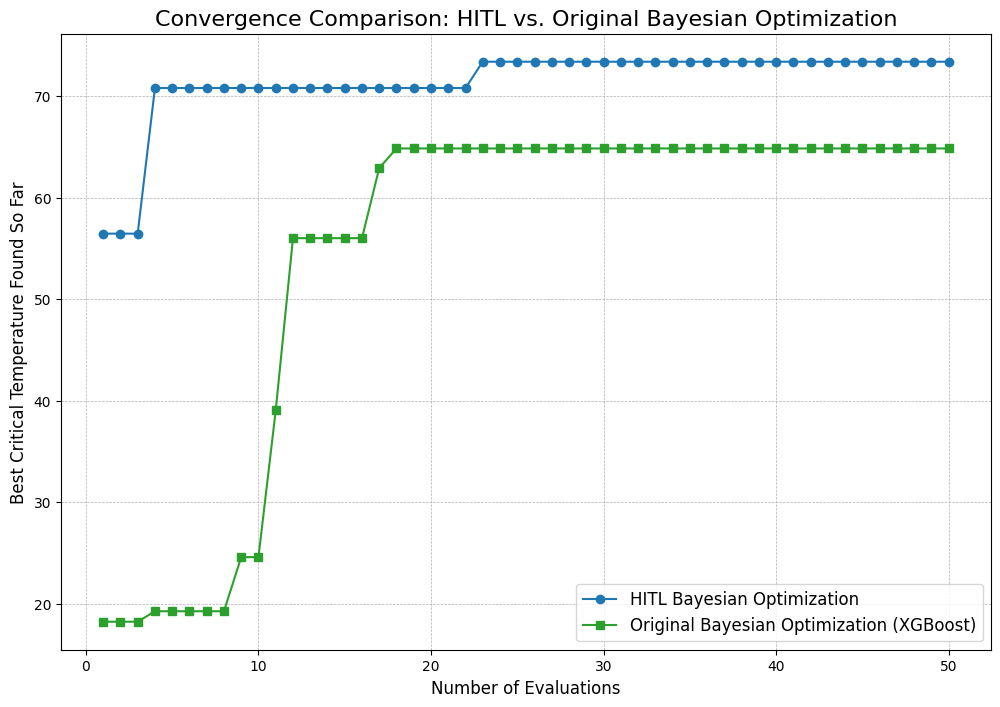

--- Comparison of Best Results ---

Original Bayesian Optimization (XGBoost):
  Best critical temperature: 64.8382
  Best profile:
    number_of_elements: 9.0000
    mean_atomic_mass: 161.1275
    wtd_mean_atomic_mass: 6.4722
    gmean_atomic_mass: 90.3033
    wtd_gmean_atomic_mass: 62.7167
    entropy_atomic_mass: 0.0000
    wtd_entropy_atomic_mass: 0.0000
    range_atomic_mass: 162.6152
    wtd_range_atomic_mass: 205.5899
    std_atomic_mass: 93.5445
    wtd_std_atomic_mass: 101.0197
    mean_fie: 375.8345
    wtd_mean_fie: 1347.9492
    gmean_fie: 544.6621
    wtd_gmean_fie: 1327.5934
    entropy_fie: 2.1578
    wtd_entropy_fie: 0.0000
    range_fie: 1304.5000
    wtd_range_fie: 1251.8202
    std_fie: 479.3717
    wtd_std_fie: 479.1584
    mean_atomic_radius: 66.4412
    wtd_mean_atomic_radius: 202.4202
    gmean_atomic_radius: 67.9828
    wtd_gmean_atomic_radius: 298.0000
    entropy_atomic_radius: 2.1420
    wtd_entropy_atomic_radius: 1.2725
    range_atomic_radius: 0.0000
    wtd

In [35]:
convergence_original = np.maximum.accumulate(-np.array(result_xgb.func_vals))

num_evaluations = min(len(convergence_hitl), len(convergence_original))
convergence_hitl_plot = convergence_hitl[:num_evaluations]
convergence_original_plot = convergence_original[:num_evaluations]

plt.figure(figsize=(12, 8))
plt.plot(
    range(1, num_evaluations + 1),
    convergence_hitl_plot,
    "o-",
    label="HITL Bayesian Optimization",
    color="tab:blue",
)
plt.plot(
    range(1, num_evaluations + 1),
    convergence_original_plot,
    "s-",
    label="Original Bayesian Optimization (XGBoost)",
    color="tab:green",
)
plt.title(
    "Convergence Comparison: HITL vs. Original Bayesian Optimization", fontsize=16
)
plt.xlabel("Number of Evaluations", fontsize=12)
plt.ylabel("Best Critical Temperature Found So Far", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

print("--- Comparison of Best Results ---")
print("\nOriginal Bayesian Optimization (XGBoost):")
print(f"  Best critical temperature: {best_critical_temp_xgb:.4f}")
print("  Best profile:")
for column, value in zip(X_train.columns, best_params_xgb):
    print(f"    {column}: {value:.4f}")

print("\nHITL Bayesian Optimization:")
print(f"  Best critical temperature: {best_temp_hitl:.4f}")
print("  Best profile:")
for column, value in zip(X_train.columns, best_params_hitl):
    print(f"    {column}: {value:.4f}")

# Conclusion

The XGBoost surrogate efficiently navigated the high-dimensional space to identify promising superconducting materials. Incorporating simulated expert feedback via a preference model further refined the search, demonstrating the potential of human-in-the-loop optimization for complex material discovery tasks.